In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('data/ex2data2.txt', header = None)
# or data = pd.read_csv(path, header=None, names=['test1','test2','accepted'])
X = data.iloc[:,:-1]
y = data.iloc[:,2]
data

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


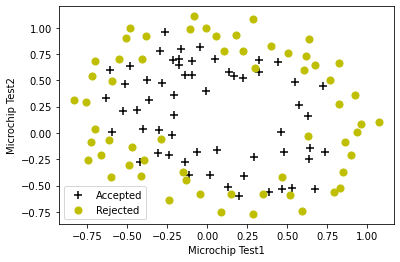

In [4]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Accepted', 'Rejected'))
plt.show()

In [5]:
model1 = keras.Sequential([
    keras.layers.Dense(2, activation='relu', name='relu_layer1'),
    keras.layers.Dense(2, activation='relu', name='relu_layer2'),
    keras.layers.Dense(1, activation='sigmoid', name='sigmoid_layer')
])

In [6]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
model1.fit(X, y)

4/4 [==============================] - 0s 1ms/step - loss: 0.7606 - accuracy: 0.4927


In [12]:
model1.predict(np.hstack((u[0], v[0])).reshape(1,2))

array([[0.49940437]], dtype=float32)

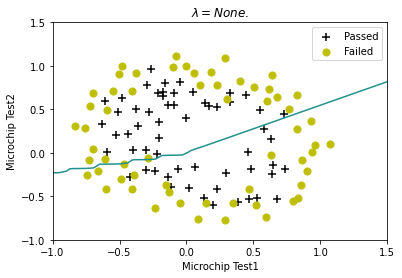

In [14]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

y = y[:, np.newaxis]

for i in range(len(u)):
    for j in range(len(v)):
        tmp = model1.predict(np.hstack((u[i], v[j])).reshape(1, 2))
        z[i,j] = np.log(tmp / (1-tmp))
        
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('$\lambda = None$.')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [326]:
model2 = keras.Sequential([
    keras.layers.Dense(2, activation='relu', name='relu_layer1', 
                       kernel_regularizer=keras.regularizers.L2(l2=1)),
    keras.layers.Dense(2, activation='relu', name='relu_layer2', 
                       kernel_regularizer=keras.regularizers.L2(l2=1)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [327]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [328]:
model2.fit(X, y)

4/4 [==============================] - 0s 1ms/step - loss: 5.0536 - accuracy: 0.5776


In [329]:
model3 = keras.Sequential([
    keras.layers.Dense(2, activation='relu', name='relu_layer1', 
                       kernel_regularizer=keras.regularizers.L2(l2=0)),
    keras.layers.Dense(2, activation='relu', name='relu_layer2', 
                       kernel_regularizer=keras.regularizers.L2(l2=0)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [330]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [331]:
model3.fit(X, y)

4/4 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5172


In [332]:
model4 = keras.Sequential([
    keras.layers.Dense(2, activation='relu', name='relu_layer1', 
                       kernel_regularizer=keras.regularizers.L2(l2=0.01)),
    keras.layers.Dense(2, activation='relu', name='relu_layer2', 
                       kernel_regularizer=keras.regularizers.L2(l2=0.01)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [333]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [334]:
model4.fit(X, y)

4/4 [==============================] - 0s 1ms/step - loss: 0.7275 - accuracy: 0.5151


In [335]:
model5 = keras.Sequential([
    keras.layers.Dense(2, activation='relu', name='relu_layer1', 
                       kernel_regularizer=keras.regularizers.L2(l2=3)),
    keras.layers.Dense(2, activation='relu', name='relu_layer2', 
                       kernel_regularizer=keras.regularizers.L2(l2=3)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [336]:
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [337]:
model5.fit(X, y)

4/4 [==============================] - 0s 1ms/step - loss: 14.7643 - accuracy: 0.5057


In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
skl_model = LogisticRegression()

In [319]:
skl_model.fit(X, y)

LogisticRegression()

In [322]:
skl_model.score(X, y)

0.5423728813559322